# CS3315 Project Data Exploration

This project uses LUFlow, a publically available dataset: https://github.com/ruzzzzz/LUFlow

LUFlow is a set of network data flows, including basic packet header information, some other extrapolated features (e.g. entropy as number of bits per byte of the data fields in the flow, packet count between source and destination, mean arrival times of packets), and a label of benign, outlier, or malicious.

We will use the benign, outlier, or malicious classification as our target feature for a classification model. Below is the basic description of the dataset from the author.

## Overview

LUFlow is an flow-based intrusion detection data set which contains a robust ground truth through correlation with threat intelligence services. 
LUFlow contains telemetry containing emerging attack vectors through the composition of honeypots within Lancaster University's address space.
The labelling mechanism is autonomous, enabling the constant capture, labelling and publishing of telemetry to this repository.
Flows which were unable to be determined as malicious, but are not part of the normal telemetry profile are labelled as outliers. These are included to encourage further analysis to discover the true intent behind their actions. Known normal traffic is also captured from production services, e.g. ssh and database traffic, and included in this data set.

This data set is constantly updated using the [Citrus](https://github.com/ruzzzzz/Citrus) framework. This repository is structured into the year and month the telemetry was captured. For example, to find telemetry captured within September 2020, the folder 2020/09 is used.

## Features
The telemetry is captured using Cisco's [Joy](https://github.com/cisco/joy) tool. This tool records multiple measurements associated with flows.
Features are engineered from these measurements, which are outlined below:

| Name | Description |
| :--- | :--- |
| src_ip | The source IP address associated with the flow. This feature is anonymised to the corresponding Autonomous System |
| src_port | The source port number associated with the flow. | 
| dest_ip | The destination IP address associated with the flow. The feature is also anonymised in the same manner as before. 
| dest_port | The destination port number associated with the flow |
| protocol | The protocol number associated with the flow. For example TCP is 6 |
| bytes_in | The number of bytes transmitted from source to destination |
| bytes_out | The number of bytes transmitted from destination to source. |
| num_pkts_in | The packet count from source to destination |
| num_pkts_out | The packet count from destination to source |
| entropy | The entropy in bits per byte of the data fields within the flow. This number ranges from 0 to 8. |
| total_entropy | The total entropy in bytes over all of the bytes in the data fields of the flow |
| mean_ipt | The mean of the inter-packet arrival times of the flow |
| time_start | The start time of the flow in seconds since the epoch. |
| time_end | The end time of the flow in seconds since the epoch |
| duration | The flow duration time, with microsecond precision |
| label | The label of the flow, as decided by Tangerine. Either benign, outlier, or malicious |

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns

Start exploration with a small subset of data, network flow data of June 19, 2020. Full dataset ranges from June of 2020 through June of 2022, with some breaks in between (breaks in data collection are not explained by the author).

In [6]:
# import data to dataframe
filename = 'data/2020.06.19.csv'
df = pd.read_csv(filename)
df.head(20)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
5,0.000000,0,0,786,59512.0,0.000000,1,1,6,786,9300.0,1592533772973172,1592533772973158,0.000000,benign,0.000014
6,0.500000,462,965,786,9300.0,5.870793,2,1,6,786,60508.0,1592533775365265,1592533775363619,8377.621000,benign,0.001646
7,0.000000,0,0,15169,53.0,0.000000,4,0,6,786,54702.0,1592533772523044,1592533765241968,0.000000,benign,7.281076
8,0.000000,0,0,786,59500.0,0.000000,1,1,6,786,9300.0,1592533772973164,1592533772973158,0.000000,benign,0.000006
9,2.303030,5152,35438,786,9300.0,1.847367,48,16,6,786,60502.0,159253377544645,1592533775367451,74984.640000,benign,0.078999


In [7]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765360 entries, 0 to 765359
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        765360 non-null  float64
 1   bytes_in       765360 non-null  int64  
 2   bytes_out      765360 non-null  int64  
 3   dest_ip        765360 non-null  int64  
 4   dest_port      740863 non-null  float64
 5   entropy        765360 non-null  float64
 6   num_pkts_out   765360 non-null  int64  
 7   num_pkts_in    765360 non-null  int64  
 8   proto          765360 non-null  int64  
 9   src_ip         765360 non-null  int64  
 10  src_port       740863 non-null  float64
 11  time_end       765360 non-null  int64  
 12  time_start     765360 non-null  int64  
 13  total_entropy  765360 non-null  float64
 14  label          765360 non-null  object 
 15  duration       765360 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 93.4+ MB


In [8]:
# get dataframe basic statistics
df.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,7.653600e+05,765360.000000,765360.000000,765360.000000,740863.000000,765360.000000,765360.000000,765360.000000,765360.000000,765360.000000,740863.000000,7.653600e+05,7.653600e+05,7.653600e+05,765360.000000
mean,3.496450e+06,1592.690275,3462.929138,2470.811163,11628.840996,3.601672,8.320769,6.238910,7.364372,25145.177230,41953.578963,1.448437e+15,1.448348e+15,2.547258e+04,2.223325
std,6.386029e+07,6512.809375,8789.176140,12904.890602,17177.408663,2.730748,26.132174,23.368682,3.971379,48396.740293,19366.791572,4.336832e+14,4.337866e+14,1.276459e+05,6.741492
min,0.000000e+00,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.592536e+10,1.592537e+10,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,51.000000,786.000000,445.000000,1.283159,1.000000,0.000000,6.000000,786.000000,32715.000000,1.592537e+15,1.592537e+15,1.583274e+02,0.000047
50%,0.000000e+00,12.000000,191.000000,786.000000,9200.000000,4.551788,3.000000,1.000000,6.000000,786.000000,52412.000000,1.592541e+15,1.592541e+15,2.146884e+03,0.006980
75%,7.875000e+01,299.000000,2416.000000,786.000000,9200.000000,5.167237,6.000000,6.000000,6.000000,25513.000000,52637.000000,1.592562e+15,1.592562e+15,1.881529e+04,0.588607
max,4.294967e+09,65512.000000,65534.000000,327932.000000,65535.000000,87.383400,255.000000,255.000000,58.000000,396998.000000,65535.000000,1.592611e+15,1.592611e+15,3.076726e+06,49.029870


In [9]:
# check for missing data
df.isna().sum()

avg_ipt              0
bytes_in             0
bytes_out            0
dest_ip              0
dest_port        24497
entropy              0
num_pkts_out         0
num_pkts_in          0
proto                0
src_ip               0
src_port         24497
time_end             0
time_start           0
total_entropy        0
label                0
duration             0
dtype: int64

Missing values in dest_port and src_port -- how to fix?

Need an ordinal encoder to encode 'label' feature to 0, 1, 2 instead of 'benign', 'outlier', or 'malicious'.

In [10]:
print('label values:', df['label'].unique())

def ordinal_encoder(category):
    dict = {'benign':0, 'outlier':1, 'malicious':2}
    return dict[category]

print('benign', ordinal_encoder('benign'))
print('outlier', ordinal_encoder('outlier'))
print('malicious', ordinal_encoder('malicious'))

label values: ['benign' 'outlier' 'malicious']
benign 0
outlier 1
malicious 2


Apply ordinal ecoder to dataframe.

In [11]:
df['label'] = df['label'].apply(ordinal_encoder)
df.head(20)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,1,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0,0.000027
5,0.000000,0,0,786,59512.0,0.000000,1,1,6,786,9300.0,1592533772973172,1592533772973158,0.000000,0,0.000014
6,0.500000,462,965,786,9300.0,5.870793,2,1,6,786,60508.0,1592533775365265,1592533775363619,8377.621000,0,0.001646
7,0.000000,0,0,15169,53.0,0.000000,4,0,6,786,54702.0,1592533772523044,1592533765241968,0.000000,0,7.281076
8,0.000000,0,0,786,59500.0,0.000000,1,1,6,786,9300.0,1592533772973164,1592533772973158,0.000000,0,0.000006
9,2.303030,5152,35438,786,9300.0,1.847367,48,16,6,786,60502.0,159253377544645,1592533775367451,74984.640000,0,0.078999


In [12]:
df.corr(numeric_only=True)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
avg_ipt,1.000000,0.001106,0.020368,-0.007129,-0.007783,0.040187,0.006862,0.007381,-0.018809,-0.027148,0.025954,0.000229,-0.001702,0.008739,-0.050163,0.033341
bytes_in,0.001106,1.000000,0.435521,-0.025646,0.035132,0.229244,0.552378,0.588405,-0.066950,-0.104330,0.024121,0.000100,0.002216,0.608746,-0.195754,0.534085
bytes_out,0.020368,0.435521,1.000000,-0.049710,-0.038449,0.132780,0.618869,0.557195,-0.129152,-0.182314,0.130819,0.000721,0.000997,0.566741,-0.341967,0.636600
dest_ip,-0.007129,-0.025646,-0.049710,1.000000,0.160788,-0.031825,-0.027689,-0.028519,-0.005100,-0.065712,-0.218904,-0.001189,-0.002512,-0.023598,0.080727,0.005138
dest_port,-0.007783,0.035132,-0.038449,0.160788,1.000000,-0.196374,-0.019570,-0.022136,-0.229411,-0.264018,-0.644717,0.000275,0.000180,0.001417,-0.373617,-0.045583
entropy,0.040187,0.229244,0.132780,-0.031825,-0.196374,1.000000,0.297408,0.370920,0.275923,0.131379,0.032908,-0.001483,0.002108,0.529755,0.046802,0.221332
num_pkts_out,0.006862,0.552378,0.618869,-0.027689,-0.019570,0.297408,1.000000,0.743503,-0.092444,-0.097757,0.051113,-0.000513,0.001470,0.615572,-0.168338,0.722367
num_pkts_in,0.007381,0.588405,0.557195,-0.028519,-0.022136,0.370920,0.743503,1.000000,-0.077094,-0.063964,0.029454,-0.001365,0.001623,0.678792,-0.107311,0.690414
proto,-0.018809,-0.066950,-0.129152,-0.005100,-0.229411,0.275923,-0.092444,-0.077094,1.000000,0.427773,-0.225731,0.000870,-0.000518,-0.061501,0.198745,-0.048468
src_ip,-0.027148,-0.104330,-0.182314,-0.065712,-0.264018,0.131379,-0.097757,-0.063964,0.427773,1.000000,-0.047193,-0.000487,0.000919,-0.089968,0.398502,-0.124161


array([[<AxesSubplot: title={'center': 'avg_ipt'}>,
        <AxesSubplot: title={'center': 'bytes_in'}>,
        <AxesSubplot: title={'center': 'bytes_out'}>,
        <AxesSubplot: title={'center': 'dest_ip'}>],
       [<AxesSubplot: title={'center': 'dest_port'}>,
        <AxesSubplot: title={'center': 'entropy'}>,
        <AxesSubplot: title={'center': 'num_pkts_out'}>,
        <AxesSubplot: title={'center': 'num_pkts_in'}>],
       [<AxesSubplot: title={'center': 'proto'}>,
        <AxesSubplot: title={'center': 'src_ip'}>,
        <AxesSubplot: title={'center': 'src_port'}>,
        <AxesSubplot: title={'center': 'time_end'}>],
       [<AxesSubplot: title={'center': 'time_start'}>,
        <AxesSubplot: title={'center': 'total_entropy'}>,
        <AxesSubplot: title={'center': 'label'}>,
        <AxesSubplot: title={'center': 'duration'}>]], dtype=object)

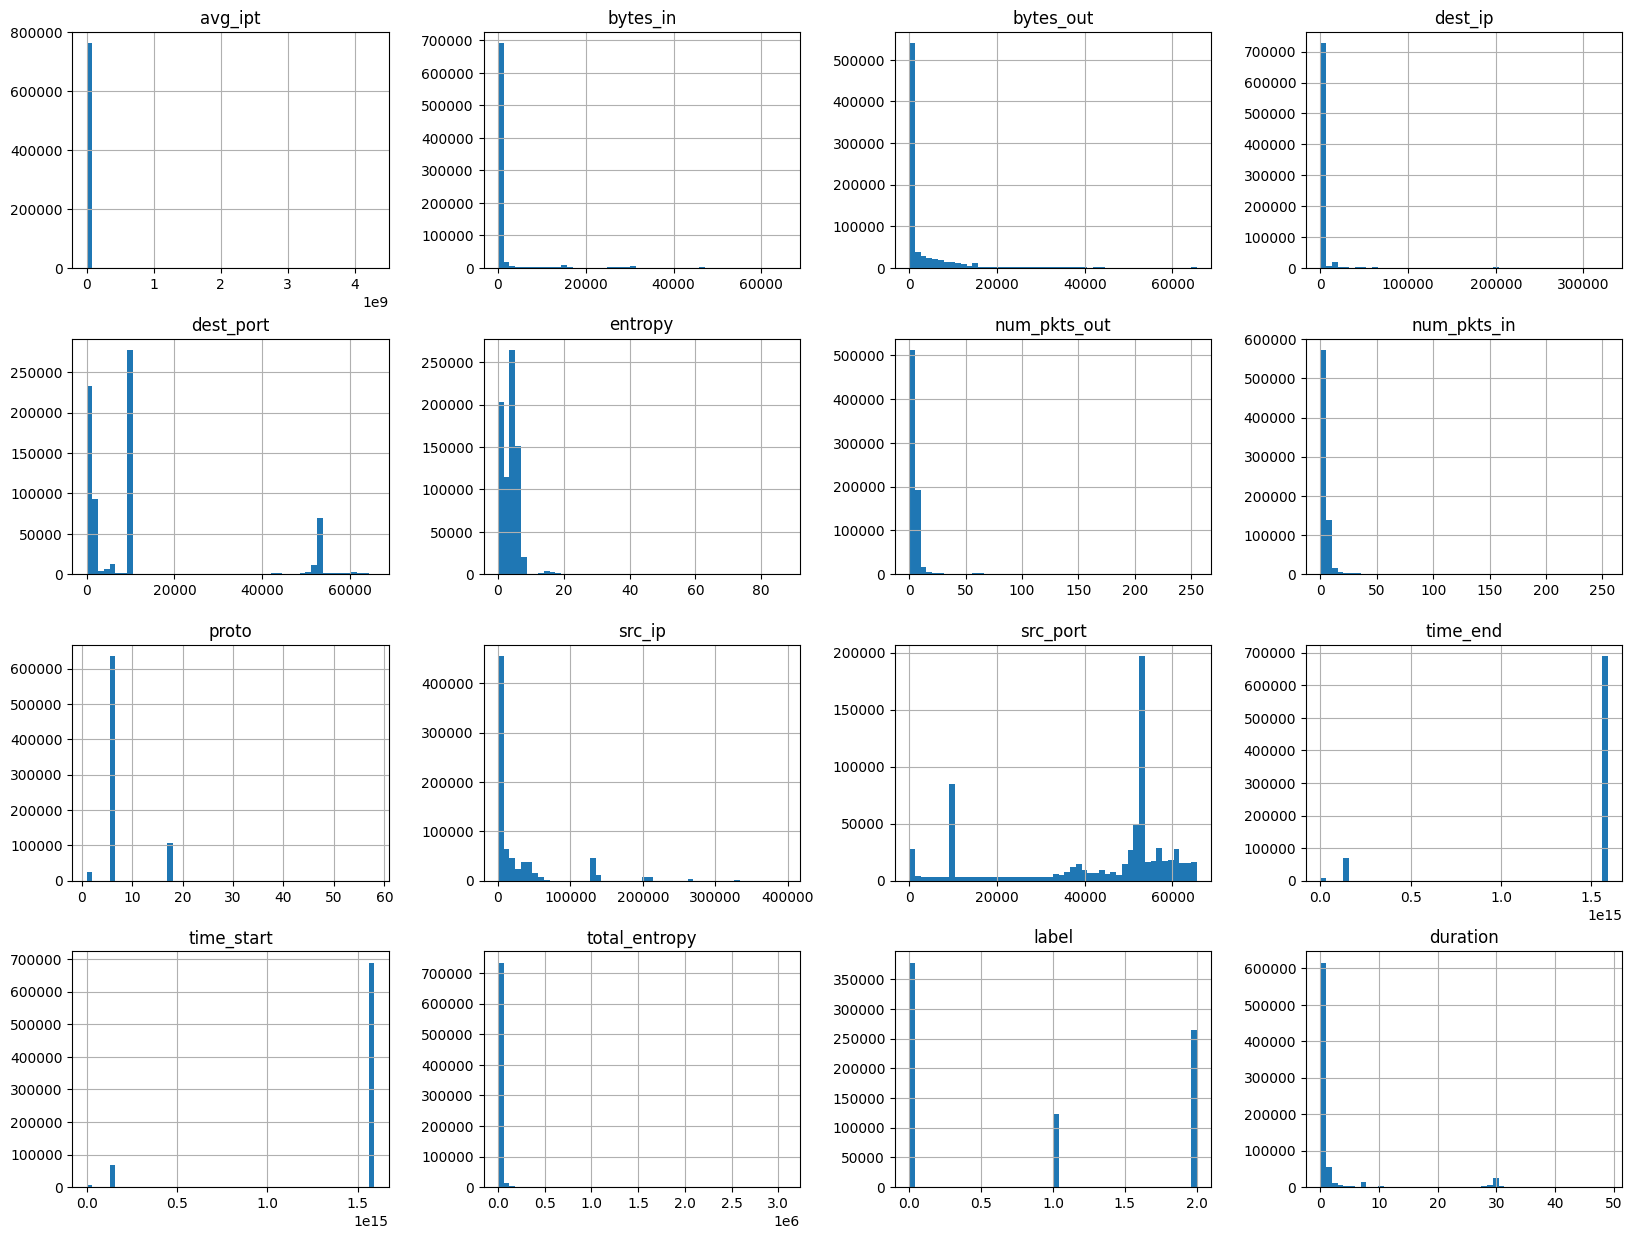

In [13]:
df.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot: xlabel='src_ip', ylabel='src_ip'>,
        <AxesSubplot: xlabel='dest_ip', ylabel='src_ip'>,
        <AxesSubplot: xlabel='src_port', ylabel='src_ip'>,
        <AxesSubplot: xlabel='dest_port', ylabel='src_ip'>,
        <AxesSubplot: xlabel='proto', ylabel='src_ip'>,
        <AxesSubplot: xlabel='label', ylabel='src_ip'>],
       [<AxesSubplot: xlabel='src_ip', ylabel='dest_ip'>,
        <AxesSubplot: xlabel='dest_ip', ylabel='dest_ip'>,
        <AxesSubplot: xlabel='src_port', ylabel='dest_ip'>,
        <AxesSubplot: xlabel='dest_port', ylabel='dest_ip'>,
        <AxesSubplot: xlabel='proto', ylabel='dest_ip'>,
        <AxesSubplot: xlabel='label', ylabel='dest_ip'>],
       [<AxesSubplot: xlabel='src_ip', ylabel='src_port'>,
        <AxesSubplot: xlabel='dest_ip', ylabel='src_port'>,
        <AxesSubplot: xlabel='src_port', ylabel='src_port'>,
        <AxesSubplot: xlabel='dest_port', ylabel='src_port'>,
        <AxesSubplot: xlabel='proto', ylabel='src_port'>,


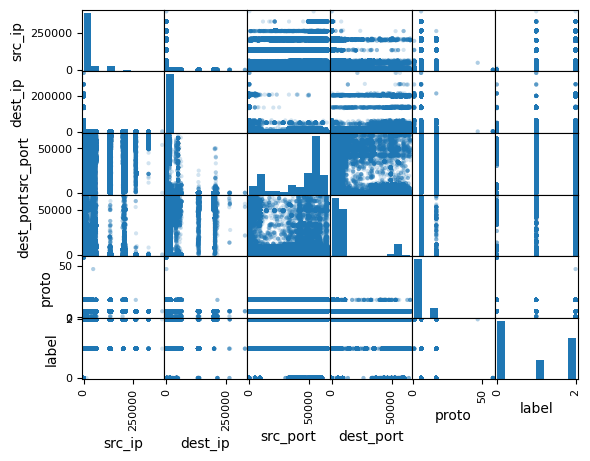

In [15]:
pd.plotting.scatter_matrix(df[['src_ip', 'dest_ip', 'src_port', 'dest_port', 'proto', 'label']], alpha = 0.2)

### Observations:
- There does not seem to be any specific correlation between ranges of source/destination IP or port that results in a label of benign, malicious, or outlier. The values themselves range all three classifications. 
- This may be due to the anonomization of the IP addresses themselves to broad autonomous systems--large amounts of malicious, benign, and outlier traffic come from any AS, and it is difficult to identify via scatter plot alone.
- However, correlation matrix does identify heavy positive and negative correlations between the label and IP address/port.
- Lower-numbered AS's appear to dominate the traffic in this sample, both as source and destination